# Levels

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

import sys
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter, Data
from Colormap import Colormap

2024-01-23 15:48:45.719978: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 15:48:45.752369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 15:48:45.752400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 15:48:45.753389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 15:48:45.758855: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 15:48:45.759443: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
plt.rcParams['text.usetex'] = True
fontsize = 12
baseFigurePath = './tmp/figures'

## Figure 4.1

In [6]:
path = '../data/008levelCollection02'
data07 = pd.read_csv(f'{path}/Test07/allMeasurments2023-07-10_10-14.csv', sep=',')

/tmp/ipykernel_236510/2061996934.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


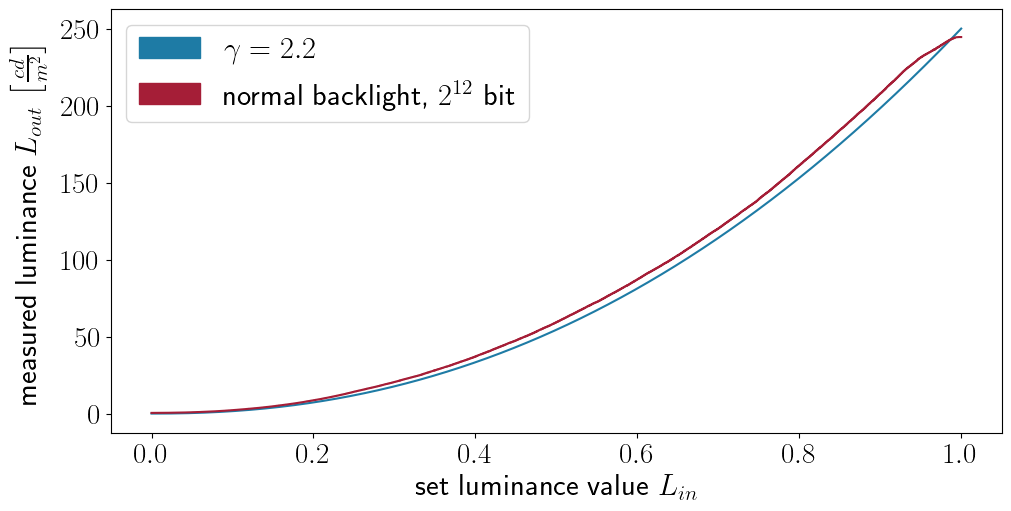

In [8]:
d = Data(data07, r'normal backlight, $2^{12}$ bit')
title = 'Comparison of measured luminance and gamma curve'

plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize= 22


df = d.dataframe
if 'mean' not in d.dataframe:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': (df.loc[:, df.columns != 'levels']).mean(axis=1)})
else:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': df['mean']})

# gamma
x = df_mean['levels']
axes.plot(x, 250*x**(2.2), label=r'$\gamma = 2.2$', c=Colormap.map[1])

axes.plot(df_mean['levels'], df_mean['mean'], label=d.name, c=Colormap.map[0])

axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize, labelpad=10)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize)

figurePath = f'{baseFigurePath}/03_01Levels/ComparisonWithGamma.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.2 (a)

/tmp/ipykernel_236510/3456059755.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


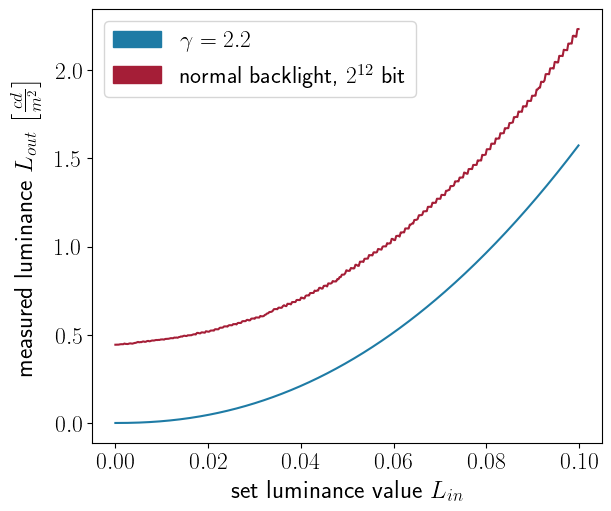

In [9]:
d = Data(data07, r'normal backlight, $2^{12}$ bit')

plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
fontsize=18


df = d.dataframe
if 'mean' not in d.dataframe:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': (df.loc[:, df.columns != 'levels']).mean(axis=1)})
else:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': df['mean']})

df_mean = df_mean[df_mean['levels'] < 0.1]

# gamma
x = df_mean['levels']
axes.plot(x, 250*x**(2.2), label=r'$\gamma = 2.2$', c=Colormap.map[1])

axes.plot(df_mean['levels'], df_mean['mean'], label=d.name, c=Colormap.map[0])

axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize, labelpad=10)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize-1)

figurePath = f'{baseFigurePath}/03_01Levels/ComparisonWithGammaLower.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.2 (b)

/tmp/ipykernel_236510/2047806672.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


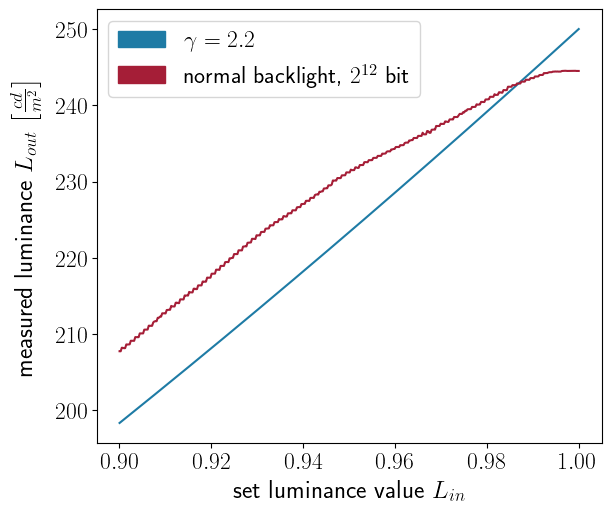

In [10]:
d = Data(data07, r'normal backlight, $2^{12}$ bit')

plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
fontsize=18


df = d.dataframe
if 'mean' not in d.dataframe:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': (df.loc[:, df.columns != 'levels']).mean(axis=1)})
else:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': df['mean']})

lowerCorrection = df_mean['mean'].min()
lowerCorrection = 0

df_mean = df_mean[df_mean['levels'] > 0.9]

# gamma
x = df_mean['levels']
axes.plot(x, lowerCorrection+(250*x**(2.2)), label=r'$\gamma = 2.2$', c=Colormap.map[1])

axes.plot(df_mean['levels'], df_mean['mean'], label=d.name, c=Colormap.map[0])

axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize, labelpad=10)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize-1)

figurePath = f'{baseFigurePath}/03_01Levels/ComparisonWithGammaUpper.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.3

/tmp/ipykernel_236510/4258946393.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


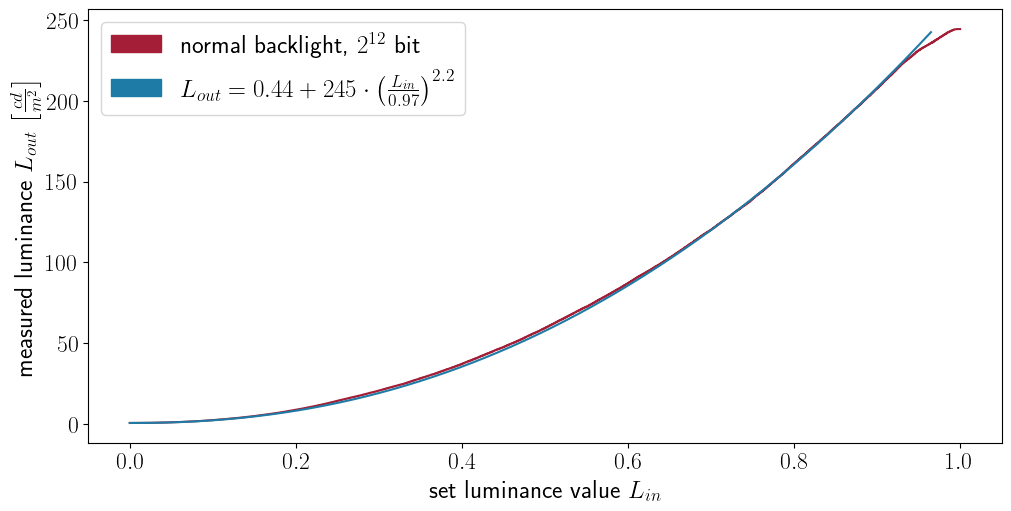

In [11]:
d = Data(data07, r'normal backlight, $2^{12}$ bit')
title = 'Comparison of measured luminance and "corrected" gamma curve'

plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize= 18


df = d.dataframe
if 'mean' not in d.dataframe:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': (df.loc[:, df.columns != 'levels']).mean(axis=1)})
else:
    df_mean = pd.DataFrame({'levels': df['levels'], 'mean': df['mean']})

lowerCorrection = df_mean['mean'].min()

# gamma
x = df_mean[df_mean['levels'] < 0.965]['levels']
axes.plot(df_mean['levels'], df_mean['mean'], label=d.name, c=Colormap.map[0])

axes.plot(x, lowerCorrection+(245*(x/0.97)**(2.2)), label=r'$L_{out} = 0.44 + 245 \cdot \left(\frac{L_{in}}{0.97}\right)^{2.2}$', c=Colormap.map[1])

axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)


# generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize)

figurePath = f'{baseFigurePath}/03_01Levels/ComparisonWithGammaCorrected.png'
fig.show()
fig.savefig(figurePath, dpi=300)